# TensorFlow Regression Example

## Creating Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1 Million Points
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
noise

array([-0.76451927,  1.14668911, -0.97776161, ..., -0.5479761 ,
       -0.49079864,  0.32229648])

In [5]:
# y = mx + b + noise_levels
b = 5

y_true =  (0.5 * x_data ) + 5 + noise

In [6]:
my_data = pd.concat([pd.DataFrame(data=x_data,
                                  columns=['X Data']),
                 pd.DataFrame(data=y_true,columns=['Y'])],
                    axis=1)

In [7]:
my_data.head()

,X Data,Y
0,0.00000,4.235481
1,0.00001,6.146694
2,0.00002,4.022248
3,0.00003,4.336950
4,0.00004,6.539786


<AxesSubplot:xlabel='X Data', ylabel='Y'>

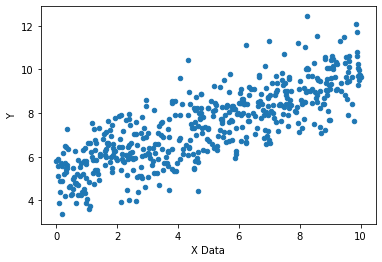

In [8]:
my_data.sample(n=500).plot(kind='scatter',x='X Data',y='Y')

# TensorFlow
## Batch Size

We will take the data in batches (1,000,000 points is a lot to pass in at once)

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [10]:
# Random 10 points to grab
batch_size = 10

** Variables **

In [11]:
m = tf.Variable(1.0)
b = tf.Variable(1.0)

** Placeholders **

In [12]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

** Graph **

In [13]:
y_model = m*xph + b

** Loss Function **

In [14]:
error = tf.reduce_sum(tf.square(yph-y_model))

** Optimizer **

In [15]:
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=0.0001)
train = optimizer.minimize(error)

** Initialize Variables **

In [16]:
init = tf.global_variables_initializer()

### Session

In [23]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),
                                     size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m,model_b = sess.run([m,b])

In [22]:
np.random.randint(len(x_data),size=batch_size)

array([ 59389, 734317,  41096, 190982, 581556, 664969, 662774, 564214,
       284132, 208934])

In [24]:
model_m

0.49422047

In [25]:
model_b

4.974615

### Results

In [26]:
y_hat = x_data * model_m + model_b

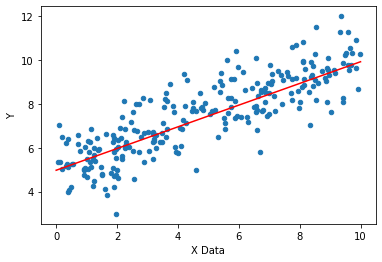

In [27]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

## tf.estimator API

Much simpler API for basic tasks like regression! We'll talk about more abstractions like TF-Slim later on.

In [28]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [29]:
estimator = tf.estimator.LinearRegressor(
    feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Farid\\AppData\\Local\\Temp\\tmpw63kgbzt', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Train Test Split

We haven't actually performed a train test split yet! So let's do that on our data now and perform a more realistic version of a Regression Task

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_eval, y_train, y_eval = train_test_split(
    x_data,
    y_true,test_size=0.3,
    random_state = 101)

In [32]:
print(x_train.shape)
print(y_train.shape)

print(x_eval.shape)
print(y_eval.shape)

(700000,)
(700000,)
(300000,)
(300000,)


### Set up Estimator Inputs

In [33]:
# Can also do .pandas_input_fn
input_func = tf.estimator.inputs.numpy_input_fn(
    {'x':x_train},
    y_train,
    batch_size=10,
    num_epochs=None,
    shuffle=True)

In [34]:
train_input_func = tf.estimator.inputs.numpy_input_fn(
    {'x':x_train},
    y_train,
    batch_size=10,
    num_epochs=1000,
    shuffle=False)

In [35]:
eval_input_func = tf.estimator.inputs.numpy_input_fn(
    {'x':x_eval},      
    y_eval,
    batch_size=10,
    num_epochs=1000,
    shuffle=False)

### Train the Estimator

In [36]:
estimator.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.


C:\Users\Farid\anaconda3-NEW\lib\site-packages\keras\engine\base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Farid\AppData\Local\Temp\tmpw63kgbzt\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 447.5276, step = 1
INFO:tensorflow:global_step/sec: 502.161
INFO:tensorflow:loss = 25.911339, step = 101 (0.179 sec)
INFO:tensorflow:global_step/sec: 819.088
INFO:tensorflow:loss = 28.177025, step = 201 (0.122 sec)
INFO:tensorflow:global_step/sec: 768.686
INFO:tensorflow:loss = 13.142353, step = 301 (0.131 sec)
INFO:tensorflow:global_step/sec: 537.246
INFO:tensorflow:loss = 13.698177, step = 401 (0.187 sec)
INFO:tensorflow:global_step

### Evaluation

In [37]:
train_metrics = estimator.evaluate(
    input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-11-17T20:25:34
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Farid\AppData\Local\Temp\tmpw63kgbzt\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Inference Time : 1.83154s
INFO:tensorflow:Finished evaluation at 2021-11-17-20:25:36
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.065996, global_step = 1000, label/mean = 7.512457, loss = 10.65996, prediction/mean = 7.299797


In [38]:
eval_metrics = estimator.evaluate(
    input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-11-17T20:25:46
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Farid\AppData\Local\Temp\tmpw63kgbzt\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Inference Time : 1.49607s
INFO:tensorflow:Finished evaluation at 2021-11-17-20:25:47
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0576752, global_step = 1000, label/mean = 7.4793563, loss = 10.576753, prediction/mean = 7.2815

In [39]:
print("train metrics: {}".format(train_metrics))
print("eval metrics: {}".format(eval_metrics))

train metrics: {'average_loss': 1.065996, 'label/mean': 7.512457, 'loss': 10.65996, 'prediction/mean': 7.299797, 'global_step': 1000}
eval metrics: {'average_loss': 1.0576752, 'label/mean': 7.4793563, 'loss': 10.576753, 'prediction/mean': 7.2815313, 'global_step': 1000}


### Predictions

In [40]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn(
    {'x':np.linspace(0,10,10)},shuffle=False)

In [41]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Farid\AppData\Local\Temp\tmpw63kgbzt\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4862733], dtype=float32)},
 {'predictions': array([5.1123104], dtype=float32)},
 {'predictions': array([5.738347], dtype=float32)},
 {'predictions': array([6.3643837], dtype=float32)},
 {'predictions': array([6.990421], dtype=float32)},
 {'predictions': array([7.6164575], dtype=float32)},
 {'predictions': array([8.242495], dtype=float32)},
 {'predictions': array([8.868531], dtype=float32)},
 {'predictions': array([9.494568], dtype=float32)},
 {'predictions': array([10.120605], dtype=float32)}]

In [42]:
predictions = []# np.array([])
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Farid\AppData\Local\Temp\tmpw63kgbzt\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [43]:
predictions

[array([4.4862733], dtype=float32),
 array([5.1123104], dtype=float32),
 array([5.738347], dtype=float32),
 array([6.3643837], dtype=float32),
 array([6.990421], dtype=float32),
 array([7.6164575], dtype=float32),
 array([8.242495], dtype=float32),
 array([8.868531], dtype=float32),
 array([9.494568], dtype=float32),
 array([10.120605], dtype=float32)]

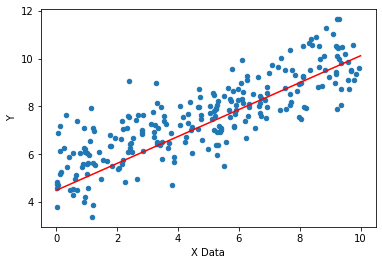

In [44]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')